In [1]:
import numpy as np
import os
import os.path as osp 
import matplotlib.pyplot as plt
import time
# Random seeds for reproducibility
np.random.seed(123)

#####################################################################
## Set working directory
#####################################################################
os.chdir(r"C:\Users\taota\Desktop\revision\Software\mcs")
start_time = time.time()

In [2]:
#####################################################################
## Function to sample sojourn time and output departure time
#####################################################################
def statefunction (N,stateI,tI,t_max):
    ##define transition rate prameters
    gamma = 2.8e-5
    lamda = 7.26e-5
    
    ####given state0
    if stateI == 0:        
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = np.sqrt(tI**2-2/(2*gamma+lamda)*np.log(1-U))
        
    ####given state1
    if stateI == 1:
        #use inverse transform sampling
        U = np.random.uniform(0,1,1)
        tO = np.sqrt(tI**2-2/(gamma+lamda)*np.log(1-U))
        
    ####given state2
    if stateI == 2:
        print('stateI == 2, END')
        tO = t_max
        
    return float(tO) #output departure time

In [3]:
#####################################################################
## Function to define the state transition 
#####################################################################
def tranfunction(stateI,tO):
    stateI = int(stateI)
    tO=float(tO)
    #define transition rate prameters
    gamma = 2.8e-5*tO
    lamda = 7.26e-5*tO
    
    #specify transition rates across state
    phi01=2*gamma
    phi02=lamda
    phi12=gamma+lamda

    #following departure
    #calculate transition probability
    ####given state1
    if stateI == 0:
        #probability
        tranAll = phi01+phi02
        tranP = [phi01/tranAll,phi02/tranAll]
        tranS = [1,2]
        tranResult = np.matrix([tranS,tranP]).transpose()
       
    ####given state1
    if stateI == 1:
        #probability
        tranAll = phi12
        tranP = 1
        tranS = 2
        tranResult = np.matrix([tranS,tranP])
        
    ####given state2
    if stateI == 2:
        print('NULL Transition out from State-2')
    
    ####generate a random number from uniform [0,1]
    u = np.random.uniform(0,1,1)
    #sum the transition probability
    sumTransP = np.cumsum(tranResult[:,1])
    #determine the index of state out
    idx = np.sum((u>=sumTransP)+ 0)+1 #+0 convert boolean to numeric
    
    #result
    stateOut = tranResult[idx-1,0]
    final_ret = [stateOut]
    
    return final_ret

In [4]:
#####################################################################
## Run Monte Carlo
#####################################################################
#number of replications
N_max = int(1e3)
#time horizon
t_max = 3e2

## Initialize storage
all_list = np.empty((0,2), int)

## Initialize no. of replication
n_rep = 1

while (n_rep <= N_max) :
    
    print(n_rep/N_max)
    
    #initialize time
    t_in_A = [0.]
    #initialize state
    state_in_A = [0]
  
    while (t_in_A[-1] < t_max):
        t_in = t_in_A[-1]
        state_in = state_in_A[-1]
        t_out = statefunction(1,state_in,t_in,t_max)
        if state_in==2:
            print('state_in==2')
            #update
            t_in_A = np.append(t_in_A, t_max)
            state_in_A = np.append(state_in_A, 2)
            
        else:
            state_out = tranfunction(state_in,t_out)
            #update
            t_in_A = np.append(t_in_A, t_out)
            state_in_A = np.append(state_in_A, state_out[0])
            
        out_list = np.column_stack((t_in_A,state_in_A))
    ###########################
    all_list = np.row_stack((all_list,out_list))
    n_rep = n_rep+1

0.001
stateI == 2, END
state_in==2
0.002
0.003
stateI == 2, END
state_in==2
0.004
stateI == 2, END
state_in==2
0.005
stateI == 2, END
state_in==2
0.006
stateI == 2, END
state_in==2
0.007
stateI == 2, END
state_in==2
0.008
stateI == 2, END
state_in==2
0.009
stateI == 2, END
state_in==2
0.01
stateI == 2, END
state_in==2
0.011
stateI == 2, END
state_in==2
0.012
stateI == 2, END
state_in==2
0.013
stateI == 2, END
state_in==2
0.014
stateI == 2, END
state_in==2
0.015
stateI == 2, END
state_in==2
0.016
stateI == 2, END
state_in==2
0.017
stateI == 2, END
state_in==2
0.018
stateI == 2, END
state_in==2
0.019
stateI == 2, END
state_in==2
0.02
stateI == 2, END
state_in==2
0.021
stateI == 2, END
state_in==2
0.022
stateI == 2, END
state_in==2
0.023
stateI == 2, END
state_in==2
0.024
stateI == 2, END
state_in==2
0.025
stateI == 2, END
state_in==2
0.026
stateI == 2, END
state_in==2
0.027
stateI == 2, END
state_in==2
0.028
stateI == 2, END
state_in==2
0.029
stateI == 2, END
state_in==2
0.03
stateI == 2

stateI == 2, END
state_in==2
0.296
stateI == 2, END
state_in==2
0.297
stateI == 2, END
state_in==2
0.298
stateI == 2, END
state_in==2
0.299
stateI == 2, END
state_in==2
0.3
stateI == 2, END
state_in==2
0.301
stateI == 2, END
state_in==2
0.302
stateI == 2, END
state_in==2
0.303
stateI == 2, END
state_in==2
0.304
stateI == 2, END
state_in==2
0.305
stateI == 2, END
state_in==2
0.306
stateI == 2, END
state_in==2
0.307
stateI == 2, END
state_in==2
0.308
stateI == 2, END
state_in==2
0.309
stateI == 2, END
state_in==2
0.31
stateI == 2, END
state_in==2
0.311
stateI == 2, END
state_in==2
0.312
stateI == 2, END
state_in==2
0.313
stateI == 2, END
state_in==2
0.314
stateI == 2, END
state_in==2
0.315
stateI == 2, END
state_in==2
0.316
stateI == 2, END
state_in==2
0.317
stateI == 2, END
state_in==2
0.318
stateI == 2, END
state_in==2
0.319
stateI == 2, END
state_in==2
0.32
stateI == 2, END
state_in==2
0.321
stateI == 2, END
state_in==2
0.322
stateI == 2, END
state_in==2
0.323
stateI == 2, END
state_i

0.622
stateI == 2, END
state_in==2
0.623
stateI == 2, END
state_in==2
0.624
0.625
stateI == 2, END
state_in==2
0.626
stateI == 2, END
state_in==2
0.627
stateI == 2, END
state_in==2
0.628
stateI == 2, END
state_in==2
0.629
stateI == 2, END
state_in==2
0.63
stateI == 2, END
state_in==2
0.631
stateI == 2, END
state_in==2
0.632
stateI == 2, END
state_in==2
0.633
stateI == 2, END
state_in==2
0.634
0.635
stateI == 2, END
state_in==2
0.636
stateI == 2, END
state_in==2
0.637
stateI == 2, END
state_in==2
0.638
stateI == 2, END
state_in==2
0.639
stateI == 2, END
state_in==2
0.64
stateI == 2, END
state_in==2
0.641
stateI == 2, END
state_in==2
0.642
stateI == 2, END
state_in==2
0.643
stateI == 2, END
state_in==2
0.644
stateI == 2, END
state_in==2
0.645
stateI == 2, END
state_in==2
0.646
stateI == 2, END
state_in==2
0.647
stateI == 2, END
state_in==2
0.648
stateI == 2, END
state_in==2
0.649
stateI == 2, END
state_in==2
0.65
stateI == 2, END
state_in==2
0.651
stateI == 2, END
state_in==2
0.652
state

0.953
stateI == 2, END
state_in==2
0.954
stateI == 2, END
state_in==2
0.955
0.956
stateI == 2, END
state_in==2
0.957
stateI == 2, END
state_in==2
0.958
stateI == 2, END
state_in==2
0.959
stateI == 2, END
state_in==2
0.96
stateI == 2, END
state_in==2
0.961
stateI == 2, END
state_in==2
0.962
stateI == 2, END
state_in==2
0.963
stateI == 2, END
state_in==2
0.964
stateI == 2, END
state_in==2
0.965
stateI == 2, END
state_in==2
0.966
stateI == 2, END
state_in==2
0.967
stateI == 2, END
state_in==2
0.968
stateI == 2, END
state_in==2
0.969
stateI == 2, END
state_in==2
0.97
stateI == 2, END
state_in==2
0.971
stateI == 2, END
state_in==2
0.972
stateI == 2, END
state_in==2
0.973
stateI == 2, END
state_in==2
0.974
stateI == 2, END
state_in==2
0.975
stateI == 2, END
state_in==2
0.976
stateI == 2, END
state_in==2
0.977
stateI == 2, END
state_in==2
0.978
stateI == 2, END
state_in==2
0.979
stateI == 2, END
state_in==2
0.98
stateI == 2, END
state_in==2
0.981
stateI == 2, END
state_in==2
0.982
stateI == 2

In [5]:
#####################################################################
## calculate probability for each state
#####################################################################
zero_idx = np.array(np.where(all_list[:,0]==0.)) #the first initialized time instant
rep_idx = np.append(zero_idx,len(all_list))#index for the begining of each replication
time_idx = np.append(np.arange(0, t_max, 1),t_max) #time step
n_step = len(time_idx)
#evaluate each time step regarding all replications
s_sum = np.zeros((n_step,3), int)

for ii in range(n_step): 
    s_all = [] #initialize at time 0
    for jj in range(N_max):
        use_idx = range(rep_idx[jj],rep_idx[jj+1])# index pf replication jj
        xx_mat = all_list[use_idx,:] #output from replication jj
        t_idx = np.max(np.where(xx_mat[:,0]<=time_idx[ii]))
        s_idx = xx_mat[t_idx,1]
        s_all = np.append(s_all,s_idx)
     #######
    s_sum[ii,:] = [np.sum(s_all==0),np.sum(s_all==1),np.sum(s_all==2)]

s_final = np.column_stack((time_idx,s_sum))
p_final = s_final[:,1:4]/N_max

In [6]:
#####################################################################
## used time
#####################################################################
end_time = time.time() 
used_time = end_time - start_time
print("--- %s seconds ---" % (used_time))

--- 9.85739254951477 seconds ---


In [7]:
######################################################
## output results as csv file
######################################################
mc_output  = np.column_stack((np.array(time_idx), p_final))
fileName = osp.join(r"C:\Users\taota\Desktop\revision\Software\mcs", "Example_2_mcs.csv" )
np.savetxt(fileName, mc_output, delimiter=",")

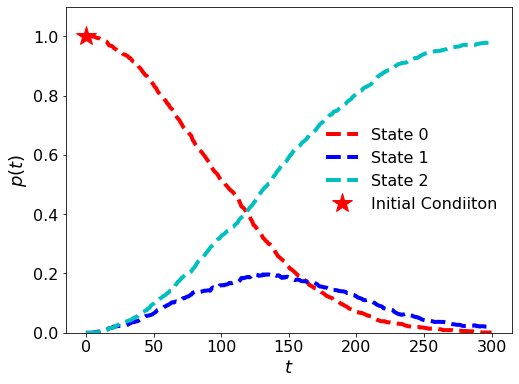

In [8]:
######################################################
## Plotting
######################################################
plt.figure(figsize=(8,6))
plt.plot(time_idx, p_final[:,0:1], 'r--', linewidth = 4, label = "State 0")
plt.plot(time_idx, p_final[:,1:2], 'b--', linewidth = 4, label = "State 1")
plt.plot(time_idx, p_final[:,2:3], 'c--', linewidth = 4, label = "State 2", markersize=20)
plt.plot(0, 1, 'r*', linewidth = 4, label = "Initial Condiiton", markersize=20)
plt.legend(frameon=False,fontsize=16)
plt.xlabel('$t$', fontsize=18)
plt.ylabel('$p(t)$', fontsize=18)
# plt.xlim([-1,30])
plt.ylim([0,1.1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

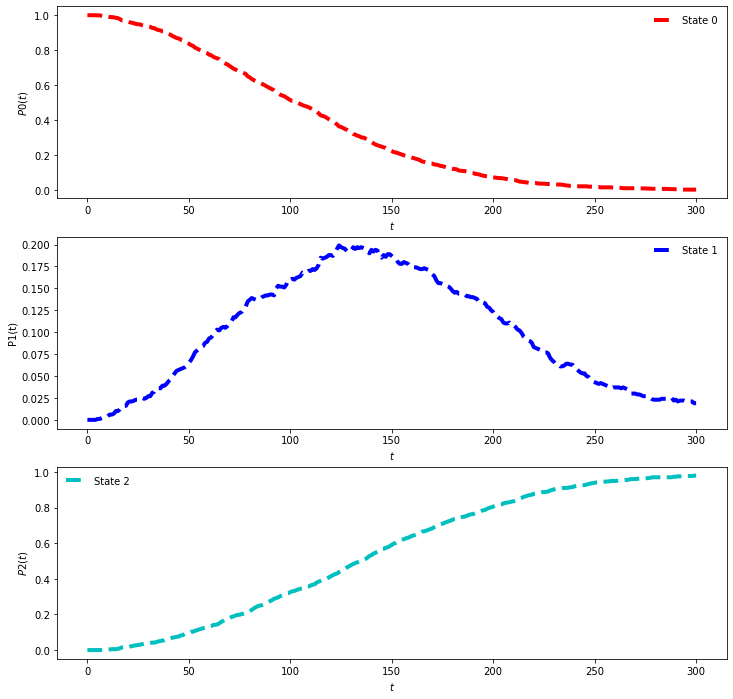

In [9]:
######################################################
## subplot
######################################################
ax = plt.figure(1,figsize=(12,12))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(3, 1, 1)
plt.plot(time_idx, p_final[:,0:1], 'r--', linewidth = 4, label = "State 0")
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$P0(t)$')

plt.subplot(3, 1, 2)
plt.plot(time_idx, p_final[:,1:2], 'b--', linewidth = 4, label = "State 1")
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('P1(t)')

plt.subplot(3, 1, 3)
plt.plot(time_idx, p_final[:,2:3], 'c--', linewidth = 4, label = "State 2")
plt.legend(frameon=False)
plt.xlabel('$t$')
plt.ylabel('$P2(t)$')

plt.show()